# Predicting the Most Demanded Items and Categories.
his is a different kind of problem than predicting a single profit number. Instead of training one model to predict a single value, a more effective approach here is to perform a time-series analysis and trend identification for each item. This will show us which products are not only popular overall but also which ones are trending upwards.

Our strategy will be:

Aggregate Sales Data: Calculate the total quantity sold for each item on a weekly basis.

Identify Top Performers: Find the top-selling items based on their total sales volume over the entire period.

Visualize Trends: Plot the weekly sales of these top items to visually inspect their demand over time.

Calculate Trend Score: For every item, we'll calculate a simple "trend score" to mathematically determine if its sales are generally increasing, decreasing, or stable.

Present a Final Ranking: Combine overall popularity with the trend score to create a final report on which items will likely be most in demand.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

Load Original Data

In [2]:
print("### 1. Loading Original Dataset ###")
df = pd.read_csv('C:/Users/3C Tech/Desktop/supermarket smart managment sytem/dataset/cargills.csv')
print("Original dataset loaded successfully.")

### 1. Loading Original Dataset ###
Original dataset loaded successfully.


Aggregate Data for Demand Analysis

In [3]:
print("\n### 2. Aggregating Data by Week ###")

# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for time-based resampling
df.set_index('Date', inplace=True)

# Resample data to get the sum of 'Quantity' sold for each item every week
weekly_demand = df.groupby('Item_Description').resample('W').agg(Total_Quantity=('Quantity', 'sum')).reset_index()
print("  - Calculated total weekly quantity for each item.")


### 2. Aggregating Data by Week ###
  - Calculated total weekly quantity for each item.


C:\Users\3C Tech\AppData\Local\Temp\ipykernel_12356\3270261944.py:10: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_demand = df.groupby('Item_Description').resample('W').agg(Total_Quantity=('Quantity', 'sum')).reset_index()


Identify Top Selling Items & Visualize Trends


### 3. Visualizing Sales Trends of Top Items ###


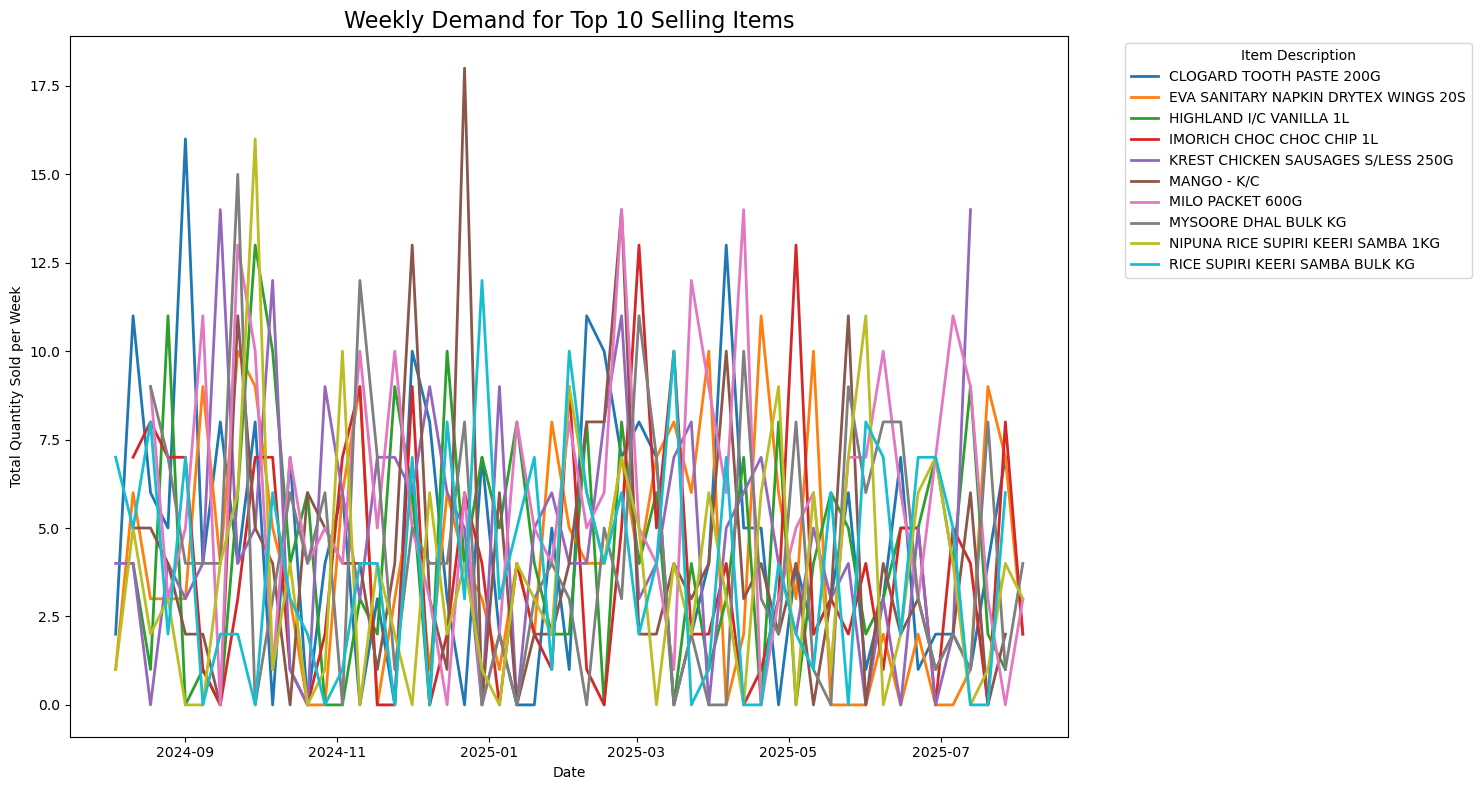

  - Trend visualization for top 10 items saved as 'top_10_demand_trends.png'.


In [4]:
print("\n### 3. Visualizing Sales Trends of Top Items ###")

# Find the top 10 items by total quantity sold
total_demand = weekly_demand.groupby('Item_Description')['Total_Quantity'].sum().sort_values(ascending=False)
top_10_items = total_demand.head(10).index

# Filter the weekly data to only include the top 10 items
top_10_demand_weekly = weekly_demand[weekly_demand['Item_Description'].isin(top_10_items)]

# Create the time-series plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_10_demand_weekly, x='Date', y='Total_Quantity', hue='Item_Description', lw=2)
plt.title('Weekly Demand for Top 10 Selling Items', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold per Week')
plt.legend(title='Item Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("  - Trend visualization for top 10 items saved as 'top_10_demand_trends.png'.")

Calculate a "Trend Score" for Every Item

In [5]:
print("\n### 4. Calculating Trend Score for All Items ###")

trend_data = []
# Loop through each unique item
for item in weekly_demand['Item_Description'].unique():
    item_df = weekly_demand[weekly_demand['Item_Description'] == item].copy()
    
    # Ensure there are at least two data points to calculate a trend
    if len(item_df) < 2:
        continue
        
    # Create a numerical time index (0, 1, 2, ...) for the linear regression
    item_df['time_index'] = np.arange(len(item_df))
    
    # Use scipy's linregress to get the slope of the sales trend
    # The slope is our "Trend Score"
    slope, intercept, r_value, p_value, std_err = linregress(item_df['time_index'], item_df['Total_Quantity'])
    
    # Get total and average quantity
    total_qty = item_df['Total_Quantity'].sum()
    avg_weekly_qty = item_df['Total_Quantity'].mean()
    
    trend_data.append({
        'Item_Description': item,
        'Total_Quantity_Sold': total_qty,
        'Avg_Weekly_Quantity': avg_weekly_qty,
        'Trend_Score': slope
    })

# Create a final summary DataFrame
summary_df = pd.DataFrame(trend_data)
# Sort by total quantity sold to see the most popular items first
summary_df = summary_df.sort_values(by='Total_Quantity_Sold', ascending=False)

print("  - Trend scores calculated successfully.")


### 4. Calculating Trend Score for All Items ###
  - Trend scores calculated successfully.


Present Final Rankings

In [6]:
print("\n### 5. Final Demand Prediction Summary ###")
print("This table shows the most popular items and their sales trend.")
print("A positive 'Trend_Score' indicates growing demand, while a negative score indicates declining demand.")
print("--------------------------------------------------------------------------------------------------")
print(summary_df.head(15).to_string())


### 5. Final Demand Prediction Summary ###
This table shows the most popular items and their sales trend.
A positive 'Trend_Score' indicates growing demand, while a negative score indicates declining demand.
--------------------------------------------------------------------------------------------------
                        Item_Description  Total_Quantity_Sold  Avg_Weekly_Quantity  Trend_Score
26                      MILO PACKET 600G                  295             5.784314    -0.008959
21    KREST CHICKEN SAUSAGES S/LESS 250G                  242             4.840000    -0.023818
7               CLOGARD TOOTH PASTE 200G                  235             4.519231    -0.049048
18               HIGHLAND I/C VANILLA 1L                  220             4.313725    -0.011222
12  EVA SANITARY NAPKIN DRYTEX WINGS 20S                  219             4.132075    -0.027092
27                  MYSOORE DHAL BULK KG                  218             4.274510    -0.038643
25                  

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

print("--- Starting Demand Forecasting Analysis ---")

--- Starting Demand Forecasting Analysis ---


Load Original Data

In [8]:
# We must use the original dataset to have access to Item_Description.
df = pd.read_csv('C:/Users/3C Tech/Desktop/supermarket smart managment sytem/dataset/cargills.csv')
print("Original dataset loaded successfully.")

Original dataset loaded successfully.


Correctly Prepare Data for Time-Series Analysis 

In [9]:
print("\nStep 1: Preparing data and fixing the TypeError...")

# First, ensure the 'Date' column is in datetime format.
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame.
# The .resample() method works most naturally on a DatetimeIndex.
df.set_index('Date', inplace=True)
print("  - 'Date' column has been set as the DataFrame index.")


Step 1: Preparing data and fixing the TypeError...
  - 'Date' column has been set as the DataFrame index.


Aggregate Data by Week

In [10]:
# Now, we can correctly group by item and resample by week ('W').
print("\nStep 2: Aggregating sales data to a weekly level...")
weekly_sales = df.groupby('Item_Description').resample('W')['Quantity'].sum().reset_index()
weekly_sales = weekly_sales[weekly_sales['Quantity'] > 0] # Keep only weeks with sales


Step 2: Aggregating sales data to a weekly level...


Identify and Visualize Top Seller Trends

Step 3: Identifying and visualizing top 10 items...


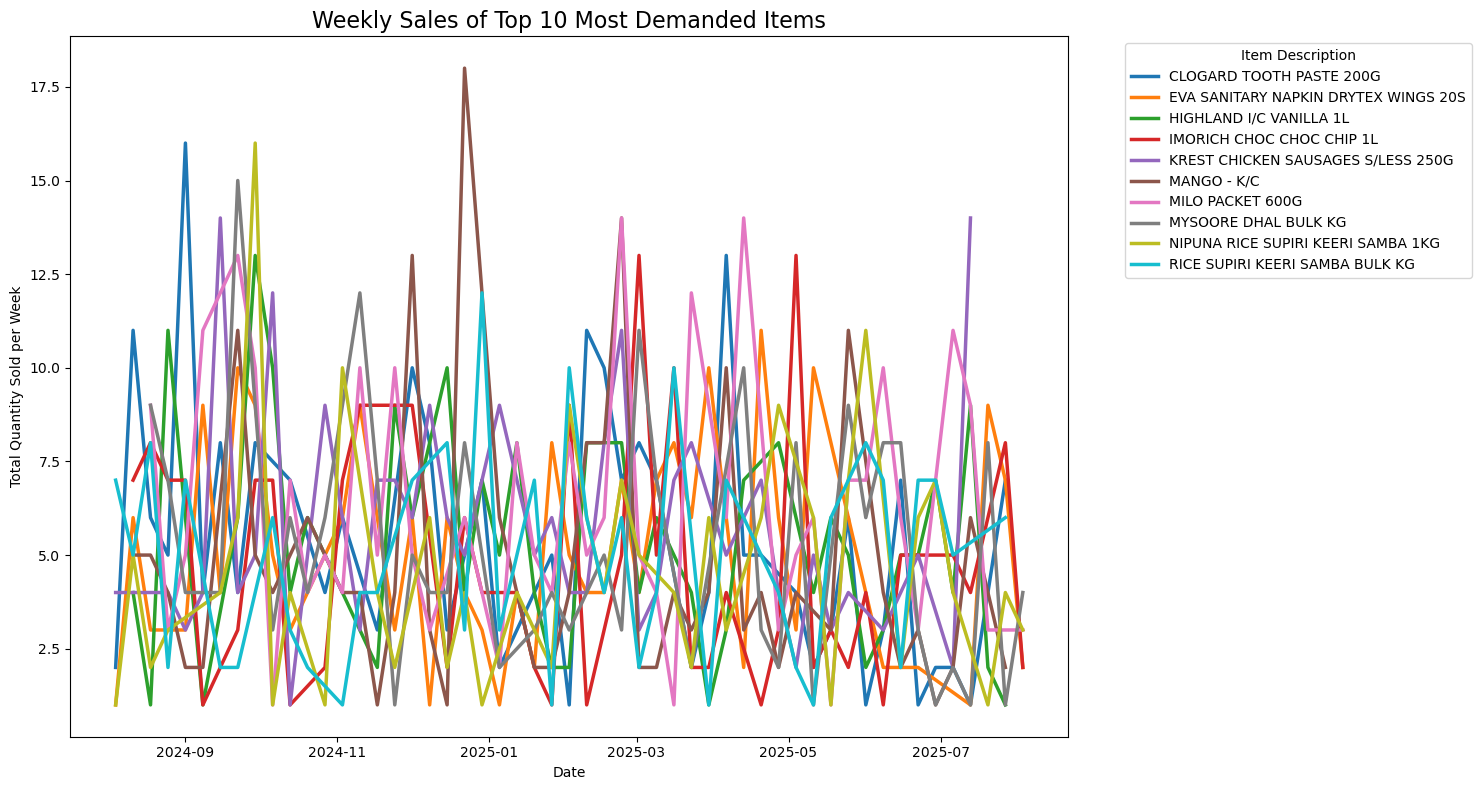

  - Sales trend visualization saved as 'demand_trends_top10.png'


In [11]:
print("Step 3: Identifying and visualizing top 10 items...")
total_sales = df.groupby('Item_Description')['Quantity'].sum().sort_values(ascending=False)
top_10_items = total_sales.nlargest(10).index

plt.figure(figsize=(15, 8))
top_items_weekly_sales = weekly_sales[weekly_sales['Item_Description'].isin(top_10_items)]
sns.lineplot(
    data=top_items_weekly_sales,
    x='Date',
    y='Quantity',
    hue='Item_Description',
    palette='tab10',
    linewidth=2.5
)
plt.title('Weekly Sales of Top 10 Most Demanded Items', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold per Week')
plt.legend(title='Item Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("  - Sales trend visualization saved as 'demand_trends_top10.png'")

Calculate Trend Score for ALL Items

In [12]:
# We calculate the slope of a linear regression line for each item's sales over time.
# A positive slope means an upward trend.
print("\nStep 4: Calculating a 'Trend Score' for every item...")
trend_data = []
all_items = weekly_sales['Item_Description'].unique()

for item in all_items:
    item_sales = weekly_sales[weekly_sales['Item_Description'] == item].copy()
    
    # We need at least 3 data points to calculate a meaningful trend
    if len(item_sales) >= 3:
        # Create a numerical time index (0, 1, 2, ...)
        item_sales['time_index'] = np.arange(len(item_sales))
        
        # Perform linear regression to find the slope (trend)
        slope, intercept, r_value, p_value, std_err = linregress(item_sales['time_index'], item_sales['Quantity'])
        
        trend_data.append({
            'Item_Description': item,
            'Total_Quantity_Sold': total_sales.loc[item],
            'Trend_Score (Slope)': slope
        })

# Create a DataFrame from the trend analysis
trend_df = pd.DataFrame(trend_data)
trend_df = trend_df.sort_values(by='Total_Quantity_Sold', ascending=False)
trend_df['Trend_Score (Slope)'] = trend_df['Trend_Score (Slope)'].round(4)




Step 4: Calculating a 'Trend Score' for every item...


Present Final Rankings

In [13]:
print("\n--- Demand Forecasting Summary ---")
print("The following table shows the overall most popular items and their sales trend.")
print("A positive 'Trend_Score' indicates growing demand.\n")
# Displaying the top 20 items for a more comprehensive view
print(trend_df.head(20))

print("\nAnalysis complete.")


--- Demand Forecasting Summary ---
The following table shows the overall most popular items and their sales trend.
A positive 'Trend_Score' indicates growing demand.

                          Item_Description  Total_Quantity_Sold  \
26                        MILO PACKET 600G                  295   
21      KREST CHICKEN SAUSAGES S/LESS 250G                  242   
7                 CLOGARD TOOTH PASTE 200G                  235   
18                 HIGHLAND I/C VANILLA 1L                  220   
12    EVA SANITARY NAPKIN DRYTEX WINGS 20S                  219   
27                    MYSOORE DHAL BULK KG                  218   
25                             MANGO - K/C                  213   
35         RICE SUPIRI KEERI SAMBA BULK KG                  204   
19               IMORICH CHOC CHOC CHIP 1L                  203   
31      NIPUNA RICE SUPIRI KEERI SAMBA 1KG                  194   
11                     EH GINGER BEER 1.5L                  190   
37        RITZBURY BLUEBERRY